In [1]:
import pandas as pd
import numpy as np
import chess_analyzer as chan

import seaborn as sns
import matplotlib.pyplot as plt

# best view options
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)


In [2]:
current_user_name = 'Rosolimo'

date_start = '2025-01-01'
date_finish = '2025-12-01'

In [ ]:
df = chan.get_analysys_results(date_start, date_finish, is_verbose=False)
work_df = chan.make_user_df(df)
work_df['date'] = work_df['game_end_time'].dt.date
work_df['week'] = work_df['game_end_time'] - pd.to_timedelta(work_df['game_end_time'].dt.weekday, unit='d')

work_df['evaluation_pawns_relative_group']

/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1751: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1751: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1751: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/home/roman/python/kotelok/chess_evaluater/chess_analyzer.py:1751: UserWarning: Could no

In [17]:
work_df.sample(3)

,game_id,game_end_time,color,player,opponent,result,opponent_result,points,opponent_points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated,url,game_phase,move_number,full_move,move_san,evaluation,evaluation_pawns,eval_change,move_type,time_remaining,opponent_time_remaining,time_used,opponent_time_used,is_same_material_kind,material,opponent_material,material_balance,is_capture,is_promotion,pawns,opponent_pawns,isolated_pawns,opponent_isolated_pawns,doubled_pawns,opponent_doubled_pawns,passed_pawns,opponent_passed_pawns,center_control,opponent_center_control,castled,opponent_castled,captures,opponent_captures,promotions,opponent_promotions,evaluation_pawns_relative,evaluation_pawns_group,evaluation_pawns_relative_group,date,week
32002,129818323365,2025-01-05 15:20:09,White,337romanmu,Totdusver,resigned,win,0.0,1.0,1694,1717,-23,180+2,blitz,chess,True,https://www.chess.com/game/live/129818323365,middlegame,29,15,Rd1,-264,-2.64,-2.38,blunder,127.7,194.1,82.3,13.9,False,30,31,-1,False,False,5,6,0,0,0,0,0,1,2,3,True,True,4,5,0,0,-2.64,-3,-3,2025-01-05,2024-12-30 15:20:09
24967,129641927651,2025-01-03 14:23:44,White,FathersOfDwarves,qwrty7x,insufficient,insufficient,0.0,0.0,1681,1699,-18,180+2,blitz,chess,True,https://www.chess.com/game/live/129641927651,endgame,121,61,Ke4,-5,-0.05,-0.05,normal,25.3,15.6,276.7,284.4,False,5,4,1,False,False,0,1,0,1,0,0,0,1,1,0,False,False,13,14,0,0,-0.05,0,0,2025-01-03,2024-12-30 14:23:44
84500,139722669806,2025-06-18 11:09:13,Black,Rosolimo,QuietMoveQuietMind,repetition,repetition,0.0,0.0,1712,1701,11,180+2,blitz,chess,True,https://www.chess.com/game/live/139722669806,endgame,116,58,Kxh1,692,6.92,-0.21,normal,132.8,116.4,163.2,179.6,True,2,2,0,True,False,2,2,2,0,0,0,1,1,1,2,False,False,13,13,1,1,-6.92,-7,-7,2025-06-18,2025-06-16 11:09:13


In [18]:
df[df['game_id'] == 140721976858][0:3][['time_control', 'time_class', 'rules']]

,time_control,time_class,rules
98342,180+2,blitz,chess
98343,180+2,blitz,chess
98344,180+2,blitz,chess


In [21]:
player_stat_df = get_player_stat(work_df, fields=['color'])

In [22]:
player_stat_df[player_stat_df['player'] == current_user_name]

,player,color,games,moves,winrate,rating,opponent_rating,accur,accur_opponent,xG,time_used_avg,time_remaining_avg,good_moves,normal_moves,inaccuracy_moves,mistake_moves,blunder_moves,last_eval,rating_difference,moves_per_game
771,Rosolimo,Black,665,25812,0.455639,1687.506767,1685.593985,0.655104,0.676612,-0.021508,181.019098,134.249026,0.024756,0.611266,0.144119,0.107276,0.112583,-9.647218,1.912782,38.815038
772,Rosolimo,White,667,26785,0.478261,1687.031484,1680.265367,0.663227,0.668943,-0.005716,186.449925,132.338228,0.025873,0.596677,0.148031,0.116632,0.112787,-3.530975,6.766117,40.157421


In [23]:
player_stat_df = get_player_stat(work_df, fields=['week', 'color'])

In [24]:
player_stat_df[player_stat_df['player'] == current_user_name][0:3]

,player,color,week,games,moves,winrate,rating,opponent_rating,accur,accur_opponent,xG,time_used_avg,time_remaining_avg,good_moves,normal_moves,inaccuracy_moves,mistake_moves,blunder_moves,last_eval,rating_difference,moves_per_game
952,Rosolimo,Black,2024-12-30 01:25:29,1,20,1.0,1728.0,1552.0,0.709962,0.662077,0.047885,85.5,165.005000,0.000000,0.550000,0.100000,0.300000,0.050000,12.10,176.0,20.0
953,Rosolimo,Black,2024-12-30 01:57:02,1,29,0.0,1716.0,1598.0,0.714775,0.744667,-0.029892,148.6,148.737931,0.068966,0.586207,0.137931,0.068966,0.137931,-10.88,118.0,29.0
954,Rosolimo,Black,2024-12-30 02:07:14,1,58,0.0,1708.0,1729.0,0.515053,0.649283,-0.134230,289.7,65.905172,0.068966,0.551724,0.120690,0.051724,0.206897,-99.99,-21.0,58.0


<Axes: xlabel='week', ylabel='rating'>

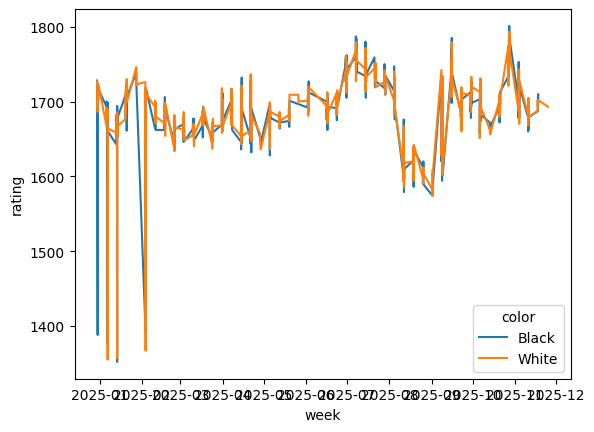

In [26]:
sns.lineplot(
    data=player_stat_df[player_stat_df['player'] == current_user_name],
    x='week', 
    y='rating', 
    hue='color'
)

<Axes: xlabel='week', ylabel='accur'>

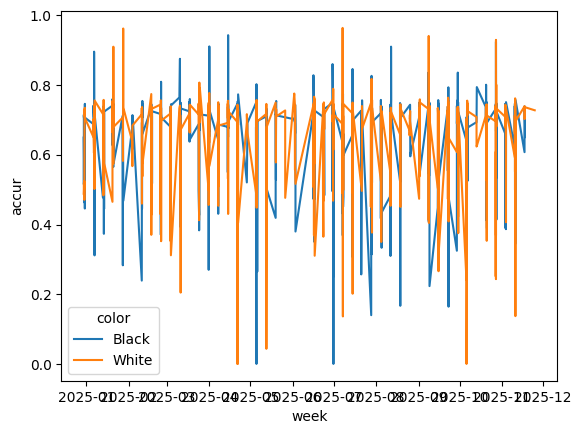

In [25]:
sns.lineplot(
    data=player_stat_df[player_stat_df['player'] == current_user_name],
    x='week', 
    y='accur', 
    hue='color'
)

<Axes: xlabel='week', ylabel='xG'>

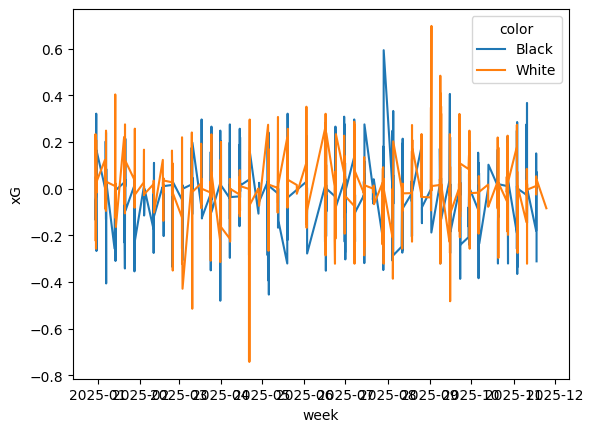

In [28]:
sns.lineplot(
    data=player_stat_df[player_stat_df['player'] == current_user_name],
    x='week', 
    y='xG', 
    hue='color'
)

<Axes: xlabel='week', ylabel='mistake_moves'>

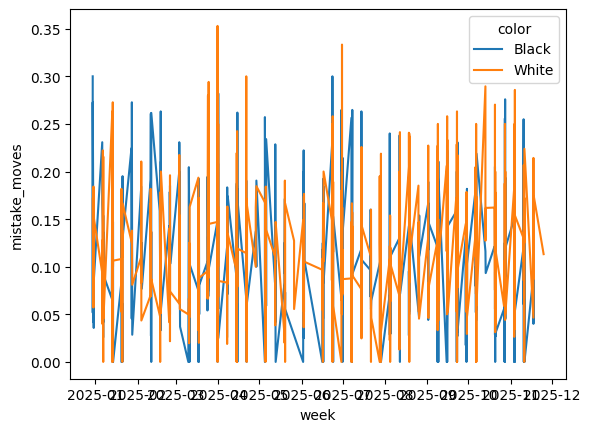

In [30]:
sns.lineplot(
    data=player_stat_df[player_stat_df['player'] == current_user_name],
    x='week', 
    y='mistake_moves', 
    hue='color'
)

<Axes: xlabel='week', ylabel='blunder_moves'>

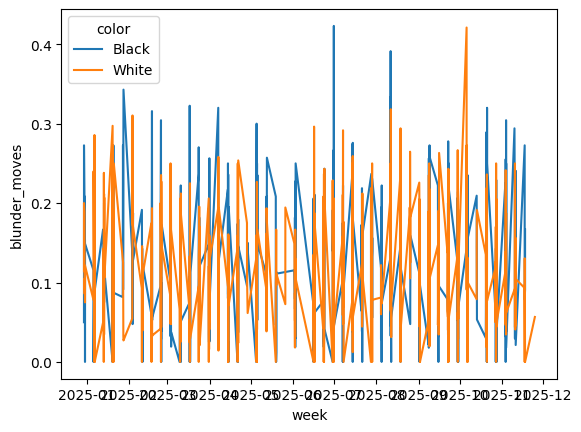

In [31]:
sns.lineplot(
    data=player_stat_df[player_stat_df['player'] == current_user_name],
    x='week', 
    y='blunder_moves', 
    hue='color'
)

In [78]:
adv_cap_df, adv_cap_stat, res_stat = get_adv_cap(work_df)

In [79]:
adv_cap_df[adv_cap_df['player'] == current_user_name][[
    'player', 'evaluation_pawns_relative_group', 'games', 'winrate', 'share'
]]

,player,evaluation_pawns_relative_group,games,winrate,share
3935,Rosolimo,-4,519,0.319846,0.389640
3936,Rosolimo,-3,581,0.371773,0.436186
3937,Rosolimo,-2,744,0.387097,0.558559
3938,Rosolimo,-1,1101,0.433243,0.826577
3939,Rosolimo,0,1326,0.467572,0.995495
3940,Rosolimo,1,1075,0.499535,0.807057
3941,Rosolimo,2,685,0.556204,0.514264
3942,Rosolimo,3,488,0.629098,0.366366
3943,Rosolimo,4,379,0.675462,0.284535


In [80]:
adv_cap_stat[adv_cap_stat['player'] == current_user_name]

,player,share,winrate
578,Rosolimo,0.493056,0.590075


In [81]:
res_stat[res_stat['player'] == current_user_name]

,player,share,winrate
675,Rosolimo,0.55274,0.377989


In [82]:
adv_cap_df, adv_cap_stat, res_stat = get_adv_cap(work_df, fields=['rules'])

In [83]:
adv_cap_stat[adv_cap_stat['player'] == current_user_name]

,rules,player,share,winrate
573,chess,Rosolimo,0.494314,0.589941
1432,chess960,Rosolimo,0.365385,0.604167


In [84]:
res_stat[res_stat['player'] == current_user_name]

,rules,player,share,winrate
670,chess,Rosolimo,0.553829,0.378646
1656,chess960,Rosolimo,0.442308,0.300000


In [85]:
adv_cap_df, adv_cap_stat, res_stat = get_adv_cap(work_df, fields=['week'])

<Axes: xlabel='week', ylabel='winrate'>

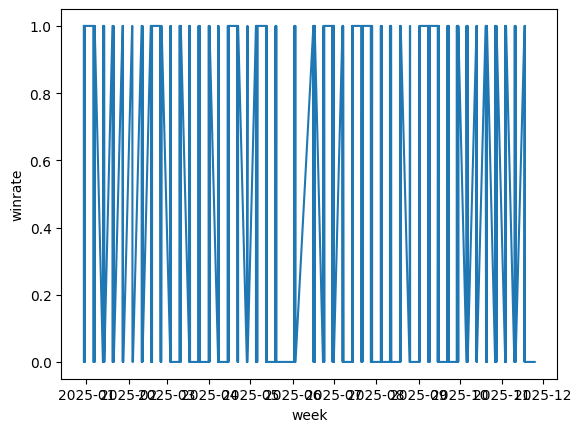

In [87]:
sns.lineplot(
    data=res_stat[res_stat['player'] == current_user_name],
    x='week', 
    y='winrate', 
    # hue='color'
)

In [189]:
get_move_stat(
                work_df[work_df['game_id'] == '140721976858'], 
                ['game_id', 'color']
            )[['game_id', 'color', 'player', 'accur']]

,game_id,color,player,accur
0,140721976858,Black,Rosolimo,0.846237
1,140721976858,White,maboalrayat,0.727479


In [138]:
stat_df = get_move_stat(
                work_df[work_df['game_id'] == '140721976858'], 
                ['game_id', 'color', 'player']
            )

In [139]:
stat_df

,game_id,color,player,games,moves_total,points,rating,rating_difference,time_used_total,material_balance_max,material_balance_min,normal_moves,inaccuracy_moves,blunder_moves,mistake_moves,good_moves,eval_avg,eval_change_total,accur
0,140721976858,Black,Rosolimo,1,65,1.0,1742.0,35.0,287.6,21,0,45,11,1,3,5,14.503846,65.07,0.846237
1,140721976858,White,maboalrayat,1,65,0.0,1707.0,-35.0,256.6,1,-21,41,10,3,10,1,-13.502769,-35.28,0.727479
